In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [88]:
data = pd.read_csv("cocacola.csv")

In [89]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [90]:
closed_prices =data["Close"]
seq_len = 15

In [91]:
mm=MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[..., None]).squeeze()
print(scaled_price)

[0.00118396 0.00108619 0.00111879 ... 0.96546428 0.97530781 0.95995857]


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
Date         15096 non-null object
Open         15096 non-null float64
High         15096 non-null float64
Low          15096 non-null float64
Close        15096 non-null float64
Adj Close    15096 non-null float64
Volume       15096 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 825.6+ KB


In [94]:
data.isnull().sum

<bound method DataFrame.sum of         Date   Open   High    Low  Close  Adj Close  Volume
0      False  False  False  False  False      False   False
1      False  False  False  False  False      False   False
2      False  False  False  False  False      False   False
3      False  False  False  False  False      False   False
4      False  False  False  False  False      False   False
5      False  False  False  False  False      False   False
6      False  False  False  False  False      False   False
7      False  False  False  False  False      False   False
8      False  False  False  False  False      False   False
9      False  False  False  False  False      False   False
10     False  False  False  False  False      False   False
11     False  False  False  False  False      False   False
12     False  False  False  False  False      False   False
13     False  False  False  False  False      False   False
14     False  False  False  False  False      False   False
15     Fa

In [95]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ADC0197D68>,
      dtype=object)

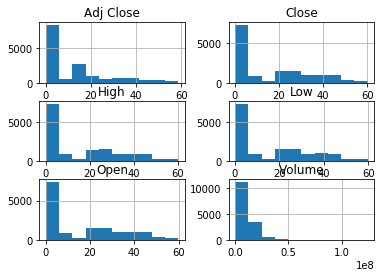

In [96]:
data.hist()

In [97]:
srt=data.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [98]:
srt.reset_index(inplace=True)

In [99]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


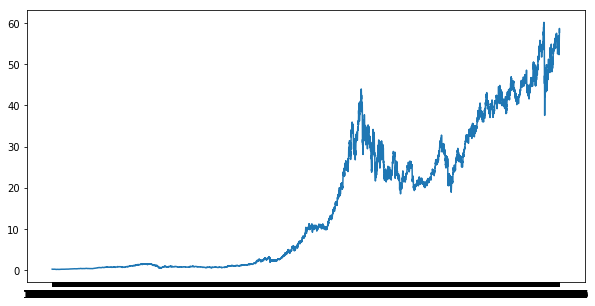

In [100]:
plt.figure(figsize=(10,5))
plt.plot(srt['Date'],srt['Close'])

In [101]:
close_srt=srt['Close']
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.00118396],
       [0.00108619],
       [0.00111879],
       ...,
       [0.96546428],
       [0.97530781],
       [0.95995857]])

In [102]:
x=[]
y=[]
for i in range(len(scaled_price)-seq_len):
    x.append(scaled_price[i:i+seq_len])
    y.append(scaled_price[i+seq_len])

In [103]:
x=np.array(x)[...,None]
y=np.array(y)[...,None]

train_x = torch.from_numpy(x[:int(0.8 * x.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * y.shape[0])]).float().unsqueeze(1)
test_x = torch.from_numpy(x[int(0.8 * x.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * y.shape[0]):]).float().unsqueeze(1)
print(train_x.shape,test_x.shape)
print(train_y.shape,test_y.shape)

torch.Size([12064, 15, 1]) torch.Size([3017, 15, 1])
torch.Size([12064, 1, 1]) torch.Size([3017, 1, 1])


10 epoch loss 0.03050958178937435
20 epoch loss 0.0236634761095047
30 epoch loss 0.010207249782979488
40 epoch loss 0.004054251592606306
50 epoch loss 0.0010794061236083508
60 epoch loss 0.0006571889971382916
70 epoch loss 0.0004601103428285569
80 epoch loss 0.00026754135615192354
90 epoch loss 0.00015846181486267596
100 epoch loss 0.00010602792463032529


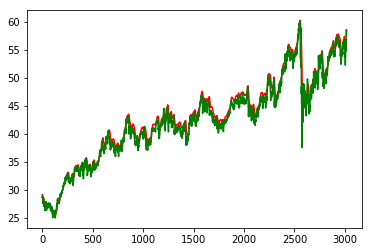

In [104]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm=nn.LSTM(input_size,hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])
model=Model(1,150)

optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.MSELoss()
num_epochs=110
for epoch in range(num_epochs):
    output=model(train_x)
    loss=loss_fn(output,train_y.squeeze(1))
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%10==0 and epoch!=0:
        print(epoch,"epoch loss",loss.item())
        
model.eval()
with torch.no_grad():
    output=model(test_x)
    
    
pred=mm.inverse_transform(output.numpy())
test_y_2d=test_y.reshape(-1,1)
real=mm.inverse_transform(test_y_2d.numpy())

plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()